# Activation Functions

### Why do we need activation function?

If we make an DNN with [1 input layer] - [1 hidden layer: 2 neurons] - [1 output layer] without the activation function, we can say the output layer y is estimated following this:

$$
\begin {align*}
\text{input layer: }& x \\
\text{hidden layer 1-1: }& w_1 \cdot x + b_1 \\
\text{hidden layer 1-2: }& w_2 \cdot x + b_2 \\
\text{output layer: }& y = (H_1 + H_2) \cdot w_3 + b_3 \\
&\;\;= ((w_1 \cdot x + b_1) + (w_2 \cdot x + b_2)) \cdot w_3 + b_3
\end {align*}
$$

However, the problem is that the linear combination of the linear combination is the linear combination, which means no matter how much hidden layers and neurons we put in the neural network, the "linear line" will be fitted for the model. To prevent this, we need to twirk the values, and there's where activation function comes from.

## Diverse activation functions

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def plotter(f):
    x = np.linspace(-10, 10, 100)
    y = f(x)
    plt.plot(x, y)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # y=0.5 기준선
    plt.show()

### Sigmoid function

$$\sigma (x) = \frac{1}{1+e^{-x}}$$

It is used in the output layer of binary classification. 

Pros: We can convert x into the boundary from 0 to 1, which enables us to get probabilistic calculation.

Cons: First, it has a gradient vanishing problem, for big positive/negative number makes $\sigma (x)$ almost 0, which makes the multiplication of the gradients into zero.
Second, the range for $\sigma (x)$ is 0 to 1, which lowers the learning speed. When we use gradient descent in the back propagation, the function is illustrated like:

$$ W := W - \eta \frac{\delta L}{\delta W}$$

In sigmoid function, when we take the derivative, the average slope of it will be over 0.5, so it makes a tendency to go into the same direction in the back propagation. It makes the weight not converge in the ideal way, but makes it find the detour way to fit it.

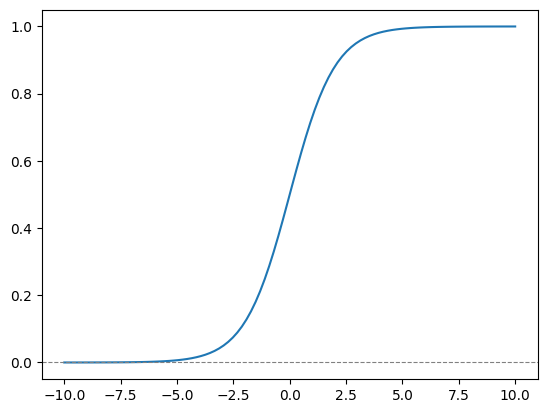

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plotter(sigmoid)

### tanh function

$$tanh(x)$$

It is used one of the hidden layer.

The output of this funciton is from -1 to 1.

Pros: The greater slope than the sigmoid makes the learning speed faster, and even the center of the function is y=0, which stablizes the learning.
Cons: It still goes through the gradient vanishing problem.

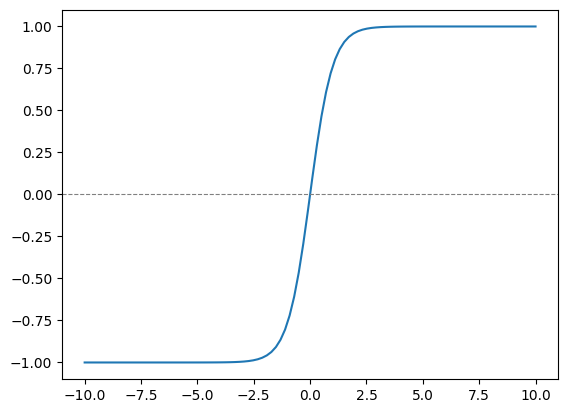

In [17]:
def tanh(x):
    return np.tanh(x)

plotter(tanh)

### ReLU (Rectified Linear Unit)

$$ max(0, x) $$

It is used in the hidden layer in CNN, DNN, and much more.

Simple calculation, and often been best activation.

Pros: Small cost for calculation leads to the faster learning. The non-lianeariry is enough to use in the DNN.

Cons: Dying ReLU problem; always returning 0 into the negative input may kill (deactivate) the neuron. When the slope is 0, the neuron is not updated.

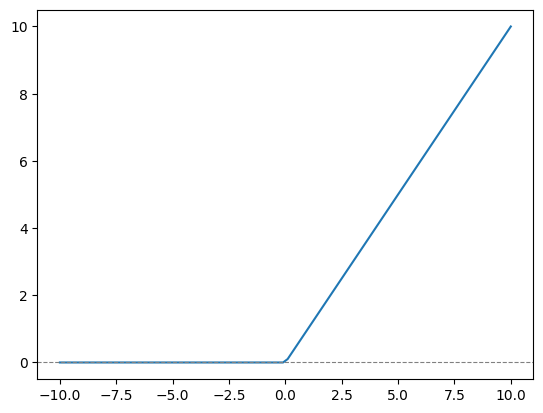

In [18]:
def ReLU(x):
    return np.maximum(0, x)

plotter(ReLU)

### Leaky ReLU

$$ max(\alpha x, x) $$

It is used to substitute the ReLU activation where dying ReLU problem happens.

Pros: Solving dying ReLU problem. More stablized learning compared to ReLU.

Cons: Need to tune hyperparameter $\alpha$, more calculation cost compared to ReLU.

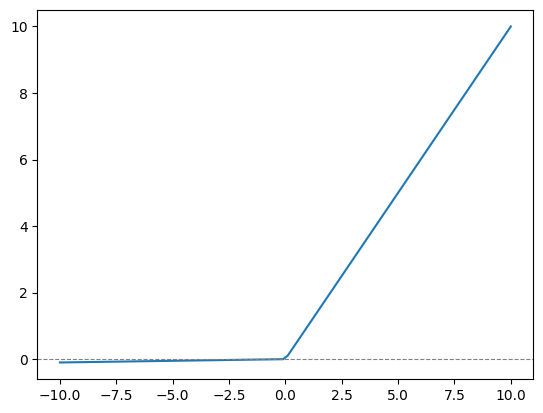

In [21]:
def LeakyReLU(x):
    return np.maximum(0.01*x, x)

plotter(LeakyReLU)

### ELU

$$\begin{cases} 
    x & x \geq 0 \\
    \alpha (e^x - 1) & x < 0
\end{cases}$$

Same reason to use with Leaky ReLU.

Pros: It's output is zero-centered, so the learning might be more smoother and faster.

Cons: Exponential function gives more calculation cost, and even if x is too small, $e^x$ might be too sensitive in the number.

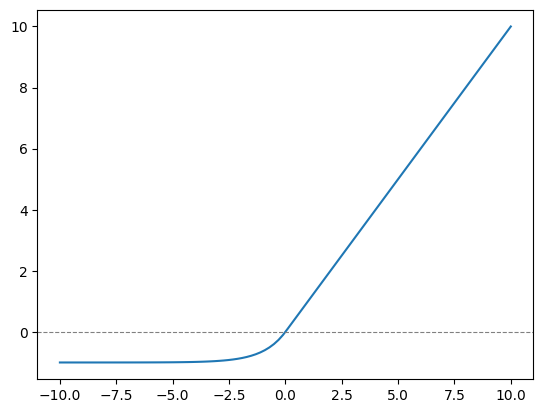

In [20]:
def elu(x, alpha=1):
    return np.where(x >= 0, x, alpha * (np.e**x - 1))

plotter(elu)